# Find distribution of cel/pill variants

In [1]:
# Load processed data (necessary?)
import pandas as pd

path = '../../data/incels/processed_comments.pkl'
data = pd.read_pickle(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 11 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   type                              object        
 1   forum                             object        
 2   thread                            object        
 3   username                          object        
 4   date                              object        
 5   content                           object        
 6   parsed_date                       datetime64[ns]
 7   content_orig                      object        
 8   netmapper_identity_matches        object        
 9   netmapper_identity_matches_spans  object        
 10  actions_attributes                object        
dtypes: datetime64[ns](1), object(10)
memory usage: 524.4+ MB


In [2]:
# Get all usernames
usernames = data.username.str.lower().unique().tolist()
len(usernames)

8467

In [3]:
# Load incels vocab and term counts from Gensim model
from gensim.models import Word2Vec

path = '../models/emb/incels.model'
model = Word2Vec.load(path)

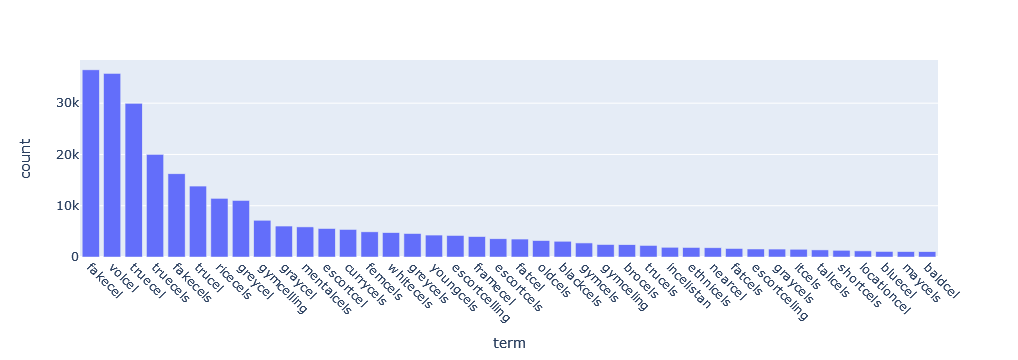

In [22]:
# cel varieties

from collections import Counter
import pandas as pd

# usernames = ['animecel2d', '@animecel2d', '@aaaaaaaaaaacel', 'tehgymcel420', '@tehgymcel420', '@diocel', 'legendarywristcel', 'aaaaaaaaaaacel', 'itsover4cel',
#              '@ritalincel', 'gymletethnicel', 'incelinside', 'sillytruecel', '@cowcel', 'cowcel', 'gyros_pretcel', 'ethnicelnl', '@zettacel',
#             'zettacel', 'thebasedcel', '@thoughtfulcel', 'thoughtfulcel', 'thereaclchincel', 'turbocuckcel_7000', 'supersaiyangymcel', 'alt="cowcel"]https://incels.co',
#             '@sergeantincel', '@gymletethnicel', 'ppecel', '@ppecel', 'finncel', '@finncel', 'speedtypingincel', 'itsogrecel', 'dogcel256',
#             'idlevillagercel', 'framecel222', 'crestfallencel', 'templarcel421', '@eskimocel', 'eskimocel', 'cameroncel', '@incellectual', 
#              'braincelsrefugee', 'proudincelistani', 'gigacel123', 'blackopsiicel']
exclude = usernames + [f'@{name}' for name in usernames] + [
    'incels', 'incel', 'incels.is', 'incels.co', 'incels.me', 'inceldom', 'celibate', 'celebrate', 'celebrity', 'celebrities', 'inceltears', 'cells', 'excel', 'excels',
    'excellent', 'nicely', 'cel', 'cels', 'cell', 'alt="cowcel"]https://incels.co', 'celibate', 'celibates', 'eskimocel', '@eskimocel',
    'celebrating', 'aedracel', '@aedracel', 'deformaspergercel', '@deformaspergercel', 'celibacy', 'johnwickcel', '@johnwickcel', 'incelkingkong',
    '@incelkingkong', 'itsogrecel', '@itsogrecel', 'incelman', '@incelman', 'celtictruecel', 'celebrated', 'cancelled', 'hungarocel', '@hungarocel',
    'chesscel', '@chesscel', 'inceltear', 'higgscel', '@higgscel', 'genecel', '@genecel', 'powerlevelcel', '@powerlevelcel', '50iqcel', '@50iqcel',
    'hikicel', '@hikicel', 'manicel', '@manicel', 'braincels', 'boardwalkcel', '@boardwalkcel', 'suicel',
]
cel_variants = Counter({wd: model.wv.get_vecattr(wd, 'count') for wd in model.wv.key_to_index.keys() if 'cel' in wd and not wd in exclude})
cel_variants = pd.DataFrame(cel_variants.most_common(40), columns=['term', 'count'])
cel_variants

import plotly.express as px

fig = px.bar(cel_variants, x='term', y='count')
fig.update_xaxes(tickangle=45)

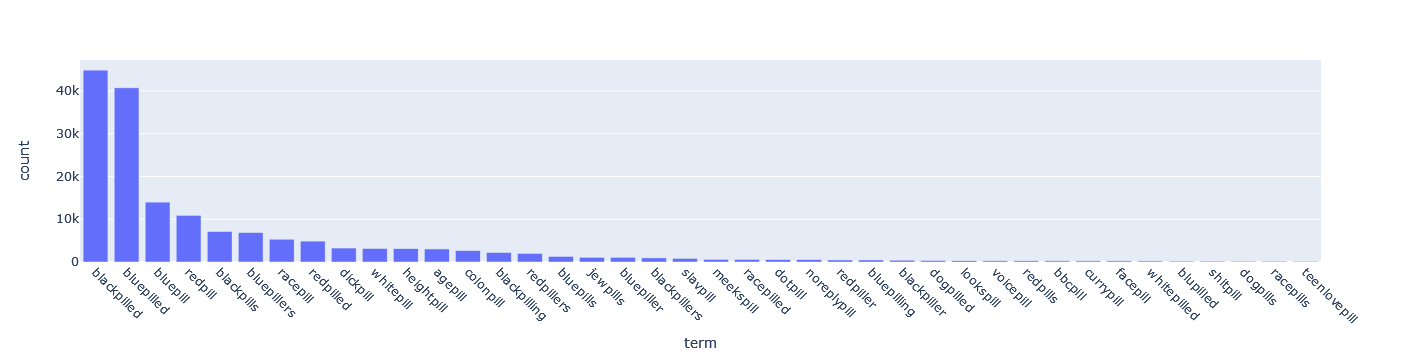

In [12]:
# pill varieties

from collections import Counter
import pandas as pd

exclude = usernames + [f'@{name}' for name in usernames] + [
    'pilled', 'pills', 'pillers', 'spill', 'theredpill', 'piller', 'pilling', 'spilling', 'spilled', 'pillars', 'pillar', 'horsepill', 'horsepills', 'pillage', 'pillages', 'spillage',
    'pillows', 'pillow', 'blackpillpres'
]
pill_variants = Counter({wd: model.wv.get_vecattr(wd, 'count') for wd in model.wv.key_to_index.keys() if 'pill' in wd and not wd in exclude})
pill_variants = pd.DataFrame(pill_variants.most_common(40), columns=['term', 'count'])
pill_variants

import plotly.express as px

fig = px.bar(pill_variants, x='term', y='count')
fig.update_xaxes(tickangle=45)

In [23]:
# Look into use of these terms
pd.set_option('display.max_colwidth', None)
# terms = ['fakecel', 'fakecels', 'fake cel', 'fake cels',] 
# terms = ['truecel', 'truecels', 'true cel', 'true cels', 'trucel', 'trucels'] 
# terms = ['suicel', 'suicels']
term = 'baldcel'

data.loc[data.content.str.contains(rf'\b{term}\b'), ['content', 'username']].sample(10)
# data.loc[data.content.str.contains(r'|'.join([rf'\b{term}\b' for term in terms])), ['content', 'username']].sample(10)

,content,username
1762844,"i still think going from 193 lbs to 165 lbs at 5'11 would significantly improve your appearance . a baldcel , chinless virgin would probably would still be a hopeless case even with such a leanmaxxing .. yet he would still be improved compared to before .",WizardofSoda
4031365,"sparrow 's song said : @i_a_m_i we have encountered a fellow named @sadtardcel on discord who claims that he was banned for making a post about holding his piss and shit in . he is adamant about his piss and shit holding claim and says that it is a legitimate non ntcel trait . in fact , he says he 's holding his shit and piss in until he is unbanned . view attachment 245197 if you suspect he is a non ugly or a foid infiltrator , i respect the ban . view attachment 245200 he is claiming he has had sex before becoming incel due to the norwood reaper ... he does not seem to type with a baldcel level of verbal iq though . this is a classic case of "" can non virgins be incel ? "" ... just thought i 'd bring it to the attention of the ban discussion megathread . fuck that dude he should stay banned",Deleted member 25274
2664800,"copewiththerope said : oh , and god has a plan for him that involves him being a coping baldcel faggot at 19 copewiththerope said : being a coping baldcel faggot at 19 copewiththerope said : 19 jesus christ .",Ryo_Hazuki
3395810,"yep . meanwhile baldcel manlet nazis get mocked on social media . you can bet your ass if a nazi looked like thor , things would be different . once again it all boils down to looks .",HomoheroBishii
60417,"ropecel64 said : if you meant the old fat whites then yes . if you mean the young incel tier ones , they 're slaying without any money . hell even in japan , white low tier normies are slaying like crazy . view attachment 430996 hell even this white truecel baldcel is fucking prime jap pussy while japanese guys rot in their rooms fapping to hentai brutal .",malta483
3067615,"veganist said : as a baldcel will hair transplant cure your baldness or not ? i 'm very uninformed on this topic it could , yes . just have to stop hair loss with meds . if you 're past nw4ish then transplants look worse as you 've lost a lot of native hair . catch it early and you 're good . evildoer said : yes , transplanted hairs will remain forever . not always . depends on the individual 's donor hair quality .",CopeWithTheRope
943988,"former baldcel / fatcel i know became a famous rapper in my country . wtf this is crazy . my mom is good friends with his mom so our families have always hung out with eachother . for as long as i ve known him he s always been a fatcel and then he became bald and it was even more over . a few years ago my mom told me that he had moved to albania to become a rapper , i thought "" lol that sounds retarded "" . then a few days ago my mom 's showing me a video and saying how it 's him . jfl he actually managed to statusmaxx by becoming a famous rapper back in our home country . in america all he would be is a middle class normie at best , but he went back to our country and has become a statusmaxxed rich rapper that s slaying stacies . if i knew how to rap i would legit do this too this is his most recent girlfriend : and this is him slaying thots :",FidelCashflow
3352922,baldcel,ATOMIC ACE PUGG
582506,ecstasy said : i was about to tag you in this thread man . we need a drugcel discord server ngl . today i started to talk about balding / coping in a cannabis grower group and some other baldcel showed me this haircut jfl : view attachment 381482 that 's fucking brutal i think i 've seen this dude before,Psilocin99
596340,"babica yaga said : view : https://www.youtube.com/watch?v=s0cmp0qhtsg&ab_channel=josiahx first thing i thought of too . i will say , though , as a baldcel , there is a sort of automatic comradery with other bald dudes .",Greyjediincel
